## LSTM Experiment
Insert Code wherever represented with "#***************#"

In [3]:
!pip install keras-preprocessing

   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   ------------------- -------------------- 20.5/42.6 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 42.6/42.6 kB 688.1 kB/s eta 0:00:00


In [22]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras_preprocessing.sequence import pad_sequences

# fix random seed for reproducibility
#numpy.random.seed(7)

In [7]:
top_words = 5000
"""
    Load the IMDB Movie Review dataset and train them into train and split from imdb.load_dataset
    Also mention the num_words parameter as top_words
"""
(X_train, y_train),(X_test,y_test) = imdb.load_data(num_word = top_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [8]:
print(X_train[1])
print(type(X_train[1]))
print(len(X_train[1]))
print(y_train[1])
print(type(y_train[1]))

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 10156, 4, 1153, 9, 194, 775, 7, 8255, 11596, 349, 2637, 148, 605, 15358, 8003, 15, 123, 125, 68, 23141, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 36893, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 25249, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 46151, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
<class 'list'>
189
0
<class 'numpy.int64'>


In [32]:
# truncate and/or pad input sequences
max_review_length = 400
"""
    Apply padding to both X_train and x_test variables with above mentioned max_review_length
"""
X_train = pad_sequences(X_train, maxlen = max_review_length)
X_test = pad_sequences(X_test, maxlen = max_review_length)

print(X_train.shape)
print(X_train[1])

(25000, 400)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [33]:
X_train = np.clip(X_train, 0, top_words-1)
X_test = np.clip(X_test, 0, top_words-1)

In [35]:
import tensorflow as tf
# Create the model

embedding_vector_length = 32

"""
    Create LSTM Model using following Layers:
    1. Embedding Layer
    2. LSTM with 10 neurons
    3. Dense Layer with sigmoid activation for Output
"""
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=embedding_vector_length))
model.add(LSTM(10))
model.add(Dense(1, activation='sigmoid'))


In [42]:
"""
    Compile the model using following criteria:
    compile(loss, optimizer, metrics=['accuracy'])
"""
from tensorflow.keras.utils import plot_model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 400, 32)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 10)                  │           1,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,731 (631.76 KB)

 Trainable params: 161,731 (631.76 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
hist=model.fit(X_train, y_train, epochs=10, batch_size=256,verbose=1, validation_data=(X_test,y_test))

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

"""
    Print Accuracy acheived by model using the above created scores variable
"""
print("Accuracy: %.2f%%" % (scores[1] * 100))

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 230ms/step - accuracy: 0.6189 - loss: 0.6672 - val_accuracy: 0.8355 - val_loss: 0.4321
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 231ms/step - accuracy: 0.8370 - loss: 0.4089 - val_accuracy: 0.8456 - val_loss: 0.3842
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 257ms/step - accuracy: 0.8677 - loss: 0.3369 - val_accuracy: 0.8444 - val_loss: 0.3683
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - accuracy: 0.8930 - loss: 0.2821 - val_accuracy: 0.8689 - val_loss: 0.3281
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 220ms/step - accuracy: 0.9142 - loss: 0.2408 - val_accuracy: 0.8700 - val_loss: 0.3166
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 217ms/step - accuracy: 0.9281 - loss: 0.2115 - val_accuracy: 0.8742 - val_loss: 0.3278
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 236ms/step - accuracy: 0.9282 - loss: 0.2029 - val_accuracy: 0.8744 - val_loss: 0.3182
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 237ms/step - accuracy: 0.9431 - loss: 0.1737 - val_accu

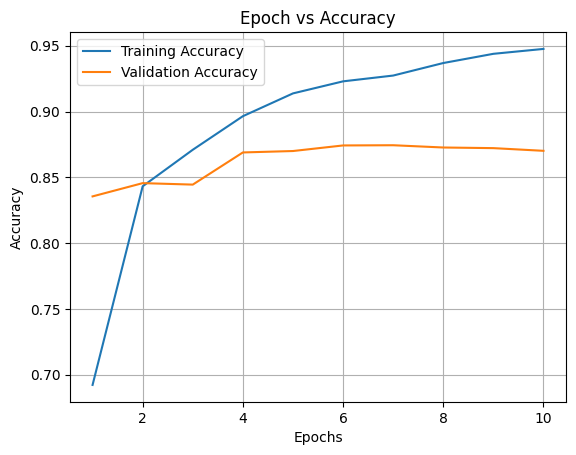

In [38]:
import matplotlib.pyplot as plt
"""
    Plot graph between epoch vs Accuracy
"""
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()


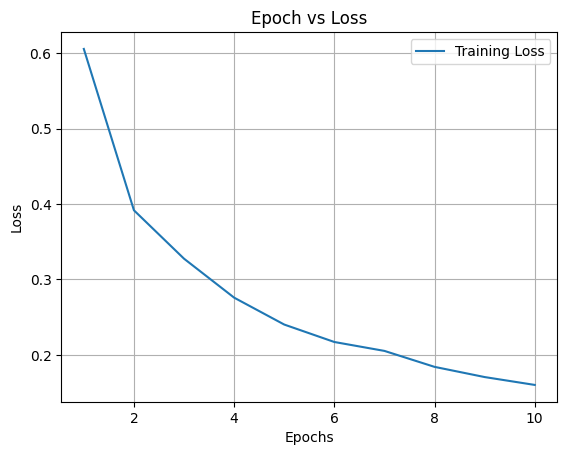

In [39]:
import matplotlib.pyplot as plt
"""
    Plot graph between epoch vs loss
"""

loss = hist.history['loss']  # Training loss for each epoch
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')

plt.title('Epoch vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


In [43]:
pred=model.predict(X_test)
print(pred)

782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step
[[0.04248219]
 [0.9850543 ]
 [0.9538685 ]
 ...
 [0.03070996]
 [0.4330367 ]
 [0.84290266]]
